In [38]:
from tensorflow.keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications import vgg16
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
#Load JSON file that contains model structure
f = Path("model_structure.json")
model_structure = f.read_text()

In [40]:
#Model building
model = model_from_json(model_structure)

In [41]:
#Weights assignment
model.load_weights("model_weights.h5")

In [42]:
feature_extraction_model = vgg16.VGG16(weights="imagenet",include_top = False,input_shape=(64,64,3))

In [59]:
#Load an image file to test. Resize it to 64X64
img = image.load_img("test.jpg",target_size=(64,64))
imgview = img

In [60]:
#converting img to numpy array
image_array = image.img_to_array(img)

In [61]:
#Since keras expect a batch, add 4th dimension using np expand_dims
images = np.expand_dims(image_array,axis=0)

In [62]:
#Normalize the data
images = vgg16.preprocess_input(images)

In [63]:
#use pre trained nn to extract features from our test img

features = feature_extraction_model.predict(images)

In [64]:
results = model.predict(features)

In [65]:
single_result = results[0][0]
single_result

1.0

Mask Present 100.0%


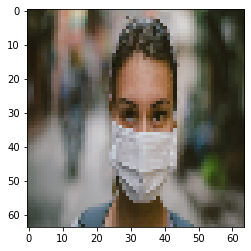

In [66]:
imgplot = plt.imshow(img)
if round(single_result)==1:
    print(f'Mask Present {single_result*100}%')
    
else:
    print("Mask Not Present")
    print(single_result)
    